In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.image import rgb_to_grayscale
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from tensorflow.keras.optimizers import Adam

from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import layers

import matplotlib.pyplot as plt
import numpy

import os
import cv2

In [2]:
# training_model = ImageDataGenerator(rescale=1/255, preprocessing_function=rgb_to_grayscale, validation_split=.25)
test_model = ImageDataGenerator(rescale=1/255)
# Example configuration
training_model = ImageDataGenerator(rescale=1/255, validation_split=0.25)

train_data = training_model.flow_from_directory('./Covid19-dataset/train', subset='training', class_mode='categorical', batch_size=16, color_mode='grayscale')
val_data = training_model.flow_from_directory('./Covid19-dataset/train', subset='validation', class_mode='categorical', batch_size=16, color_mode='grayscale')


# train_data = training_model.flow_from_directory('./Covid19-dataset/train', color_mode='grayscale', subset='training')
# val_data = training_model.flow_from_directory('./Covid19-dataset/train', color_mode='grayscale', subset='validation')
test_data = test_model.flow_from_directory('./Covid19-dataset/test', color_mode='grayscale', class_mode='categorical', batch_size=16)

Found 190 images belonging to 3 classes.
Found 61 images belonging to 3 classes.
Found 66 images belonging to 3 classes.


In [3]:
test_data.image_shape

(256, 256, 1)

In [4]:
train_data.class_indices

{'Covid': 0, 'Normal': 1, 'Pneumonia': 2}

In [3]:
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

In [4]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, InputLayer

In [5]:
log = 'logs/'
callback = tf.keras.callbacks.TensorBoard(log_dir=log)

In [20]:
model = Sequential()

In [21]:
model.add(InputLayer(input_shape=(256, 256, 1)))

In [22]:
model.add(Conv2D(32, 3, 1, activation='relu'))
model.add(MaxPooling2D())

In [23]:
model.add(Conv2D(128, 3, 1, activation='relu'))
model.add(MaxPooling2D())

In [24]:
model.add(Conv2D(64, 3, 1, activation='relu'))
model.add(MaxPooling2D())

In [25]:
model.add(Conv2D(32, 3, 1, activation='relu'))
model.add(MaxPooling2D())

In [19]:
# model.add(Conv2D(16, 3, 1, activation='relu'))
# model.add(MaxPooling2D())

In [95]:
# model.add(Conv2D(128, 3, 1, activation='relu'))
# model.add(MaxPooling2D())

In [26]:
model.add(Flatten())

In [27]:
# model.add(Dense(512, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(3, activation='softmax'))

In [28]:
model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.0001), metrics=['accuracy'])

In [29]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 254, 254, 32)      320       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 127, 127, 32)      0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 125, 125, 128)     36992     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 62, 62, 128)       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 60, 60, 64)        73792     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 30, 30, 64)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 28, 28, 32)       

In [30]:
hist = model.fit(train_data, epochs=100, validation_data=val_data, callbacks=[callback])

Epoch 1/100
12/12 [==============================] - 2s 112ms/step - loss: 1.0737 - accuracy: 0.4368 - val_loss: 1.0239 - val_accuracy: 0.4426
Epoch 2/100
12/12 [==============================] - 1s 41ms/step - loss: 0.9868 - accuracy: 0.5211 - val_loss: 0.8936 - val_accuracy: 0.8197
Epoch 3/100
12/12 [==============================] - 1s 42ms/step - loss: 0.8173 - accuracy: 0.7368 - val_loss: 0.6411 - val_accuracy: 0.8525
Epoch 4/100
12/12 [==============================] - 1s 42ms/step - loss: 0.5839 - accuracy: 0.8211 - val_loss: 0.3943 - val_accuracy: 0.9180
Epoch 5/100
12/12 [==============================] - 1s 42ms/step - loss: 0.3667 - accuracy: 0.8737 - val_loss: 0.4098 - val_accuracy: 0.7869
Epoch 6/100
12/12 [==============================] - 1s 42ms/step - loss: 0.3251 - accuracy: 0.8684 - val_loss: 0.2296 - val_accuracy: 0.9344
Epoch 7/100
12/12 [==============================] - 1s 41ms/step - loss: 0.2344 - accuracy: 0.9263 - val_loss: 0.2139 - val_accuracy: 0.9180
Epoch

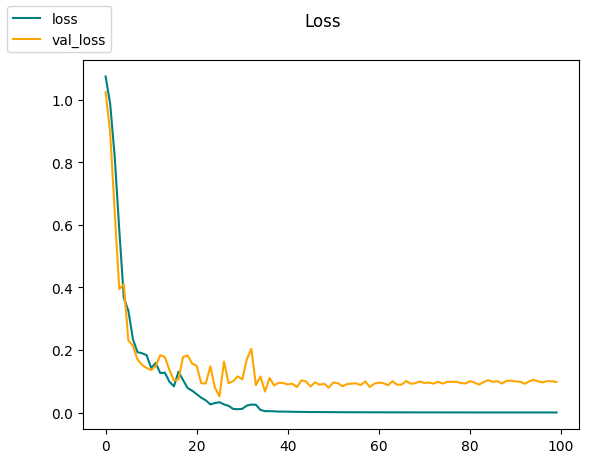

In [31]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss')
fig.legend(loc='upper left')
plt.show()